# Common Python Libraries

In this notebook we will be going through some essential python libraries, namely **Numpy** and **Matplotlib**


## Introduction

Python is a great general-purpose programming language on its own.
Its computational capabilty, usability and convenience can be greatly enhanced with the help of the addition of a few libraries(such as numpy, matplotlib, scikit, pandas etc.)


In this tutorial, we will cover the basics of these essential libraries:

* Numpy: Arrays, Array indexing, Datatypes, Array math, Broadcasting
* Matplotlib: Plotting, Subplots, Images 

## Numpy

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for computation and manipulation of these arrays.

To use Numpy, we first need to import the `numpy` package:

In [3]:
import numpy as np

### Arrays

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

Numpy arrays can be initialized from nested Python lists, and elements can be accessed by using square brackets:

In [ ]:
a = np.array([1, 2, 3])  # Create a rank 1 array
print(type(a),"\n", a.shape, a[0], a[1], a[2])
a[0] = 5                 # Change an element of the array
print(a)                  

(<type 'numpy.ndarray'>, '\n', (3,), 1, 2, 3)
[5 2 3]


In [ ]:
b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
print(b)

[[1 2 3]
 [4 5 6]]


In [ ]:
print (b.shape) # Prints the shape of the array               
print (b[0, 0], b[0, 1], b[1, 0])

(2, 3)
1 2 4


**Note** : the shapes (2, ) and (2,1) are NOT the same. In both cases, only two elements are present but in the first example you only require one index to access both elements, whereas in the second case you need two sets of indices but the second would always be 0. 

Numpy also provides many functions to create arrays:

In [ ]:
a = np.zeros((2,2))  # Create an array of all zeros
print (a)

[[0. 0.]
 [0. 0.]]


In [ ]:
b = np.ones((1,2))   # Create an array of all ones
print (b)

[[1. 1.]]


In [ ]:
c = np.full((2,2), 7) # Create a constant array
print (c) 

[[7 7]
 [7 7]]


In [ ]:
d = np.eye(2)        # Create a 2x2 identity matrix
print (d)

[[1. 0.]
 [0. 1.]]


In [ ]:
e = np.random.random((2,2)) # Create an array filled with random values
print (e)

[[0.04522778 0.19508671]
 [0.00598023 0.39154546]]


### Array indexing

Numpy offers several ways to index into arrays.

**Slicing** : Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [ ]:
import numpy as np
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
b = a[:2, 1:3]
print (b)

[[2 3]
 [6 7]]


A slice of an array is a view into the same data, so modifying it will modify the original array.

In [ ]:
print (a[0, 1])
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print (a[0, 1]) 

2
77


You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array. Note that this is quite different from the way that MATLAB handles array slicing:

In [ ]:
# Create the following rank 2 array with shape (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print (a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Two ways of accessing the data in the middle row of the array.
Mixing integer indexing with slices yields an array of lower rank,
while using only slices yields an array of the same rank as the
original array:

In [ ]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a  
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
row_r3 = a[[1], :]  # Rank 2 view of the second row of a
print (row_r1, row_r1.shape) 
print (row_r2, row_r2.shape)
print (row_r3, row_r3.shape)

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[[5 6 7 8]] (1, 4)


Integer array indexing: When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:

In [ ]:
a = np.array([[1,2], [3, 4], [5, 6]])

# An example of integer array indexing.
# The returned array will have shape (3,) and 
print (a[[0, 1, 2], [0, 1, 0]])

# The above example of integer array indexing is equivalent to this:
print (np.array([a[0, 0], a[1, 1], a[2, 0]]))

[1 4 5]
[1 4 5]


One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [ ]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print (a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [ ]:
# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print (a[np.arange(4), b])  # Prints "[ 1  6  7 11]"
# np.arange essentially gives you evenly spaced values given a certain interval

[ 1  6  7 11]


In [ ]:
# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10
print (a)

[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


**Boolean array indexing** : Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [ ]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print (a[bool_idx])

# We can do all of the above in a single concise statement:
print (a[a > 2])

[3 4 5 6]
[3 4 5 6]


### Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [ ]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.int64)  # Force a particular datatype

print (x.dtype, y.dtype, z.dtype)

int32 float64 int64


You can read all about numpy datatypes in the [documentation](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

### Array math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [ ]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)
print(x,"\n")
print(y,"\n")

# Elementwise sum; both produce the array
print (x + y)
print (np.add(x, y))

[[1. 2.]
 [3. 4.]] 

[[5. 6.]
 [7. 8.]] 

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [ ]:
# Elementwise difference; both produce the array
print (x - y)
print (np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [ ]:
# Elementwise product; both produce the array
print (x * y)
print (np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [ ]:
# Elementwise division; both produce the array
print (x / y)
print (np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [ ]:
# Elementwise square root; produces the array
print (np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


Note that unlike MATLAB, `*` is elementwise multiplication, not matrix multiplication. We instead use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. dot is available both as a function in the numpy module and as an instance method of array objects:

In [ ]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])


# Inner product of vectors; both produce 219 (9x11 + 10x12)
print (v.dot(w))
print (np.dot(v, w))

219
219


In [ ]:
# Matrix / vector product; both produce the rank 1 array [29 67]
print (x.dot(v))
print (np.dot(x, v))

[29 67]
[29 67]


In [ ]:
# Matrix / matrix product; both produce the rank 2 array
print (x.dot(y))
print (np.dot(x, y))

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [ ]:
x = np.array([[1,2],[3,4]])

print(x,"\n")
print (np.sum(x))  # Compute sum of all elements; prints "10"
print (np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print (np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

[[1 2]
 [3 4]] 

10
[4 6]
[3 7]


You can find the full list of mathematical functions provided by numpy in the [documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the T attribute of an array object:

In [ ]:
print (x)
print (x.T)

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]


### Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:

In [ ]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

print (y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


This works; however when the matrix `x` is very large, computing an explicit loop in Python could be slow. Note that adding the vector v to each row of the matrix `x` is equivalent to forming a matrix `vv` by stacking multiple copies of `v` vertically, then performing elementwise summation of `x` and `vv`. We could implement this approach like this:

In [ ]:
vv = np.tile(v, (4, 1))  # Stack 4 copies of v on top of each other
print (vv)               # Prints "[[1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]]"

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]


In [ ]:
y = x + vv  # Add x and vv elementwise
print (y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Numpy broadcasting allows us to perform this computation without actually creating multiple copies of v. Consider this version, using broadcasting:

In [ ]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print (y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


The line `y = x + v` works even though `x` has shape `(4, 3)` and `v` has shape `(3,)` due to broadcasting; this line works as if v actually had shape `(4, 3)`, where each row was a copy of `v`, and the sum was performed elementwise.

Rules of Broadcasting can be found in the [documentation](https://numpy.org/doc/stable/user/basics.broadcasting.html).


Functions that support broadcasting are known as universal functions. You can find the list of all universal functions in the [documentation](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

Here are some applications of broadcasting:

In [ ]:
# Compute outer product of vectors
## which is the same as v.wT
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:

print (np.reshape(v, (3, 1)) * w)

[[ 4  5]
 [ 8 10]
 [12 15]]


In [ ]:
# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:

print (x + v)

[[2 4 6]
 [5 7 9]]


In [ ]:
# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:

print ((x.T + w).T)

[[ 5  6  7]
 [ 9 10 11]]


In [ ]:
# Another solution is to reshape w to be a row vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print (x + np.reshape(w, (2, 1)))

[[ 5  6  7]
 [ 9 10 11]]


In [ ]:
# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
print( x * 2)

[[ 2  4  6]
 [ 8 10 12]]


Broadcasting typically makes your code more concise and faster, so you should strive to use it where possible.

This brief overview has touched on many of the important things that you need to know about numpy, but is far from complete. Check out the [numpy reference](http://docs.scipy.org/doc/numpy/reference/) to find out much more about numpy.

Now lets go back to one of the code snippets we wrote earlier

In [20]:
import time
import numpy as np

n = 1000000

a = np.arange(n)   
b = np.arange(n)

c = range(n)
d = range(n)
res = []

init_time = time.time() 
for i in range(0,n):
  res.append(int (c[i] * d[i]))  
  

print("Time taken by Lists :",  
      (time.time() - init_time), 
      "seconds") 
  
 
init_time = time.time() 
res = a * b 
  
  
print("Time taken by NumPy Arrays :", 
      (time.time() - init_time), 
      "seconds") 

Time taken by Lists : 0.5566177368164062 seconds
Time taken by NumPy Arrays : 0.015178918838500977 seconds


## Matplotlib

Matplotlib is a plotting library that can help you with interpretation of data and its supposed distribution. In this section give a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB.

In [2]:
import matplotlib.pyplot as plt

By running this special iPython command, we will be displaying plots inline:

In [ ]:
%matplotlib inline

### Plotting

The most important function in `matplotlib` is plot, which allows you to plot 2D data. Here is a simple example:

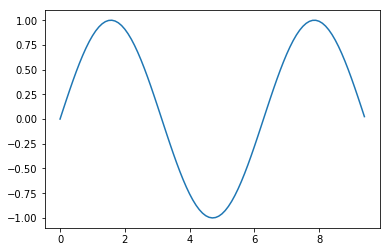

In [ ]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

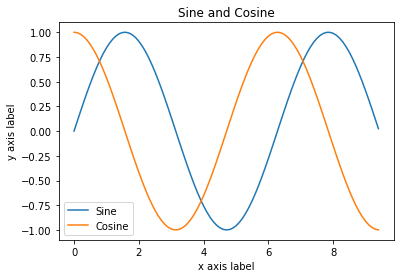

In [ ]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

You can also create **scatter plots** to know the overall distribution of data as a function of two variables

<function matplotlib.pyplot.show>

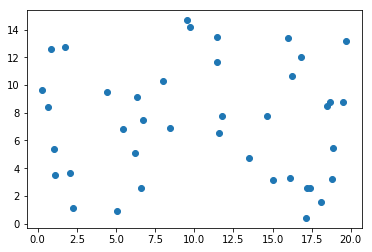

In [ ]:
x_scatter = np.random.rand(40,) * 20
y_scatter = np.random.rand(40,) * 15

plt.scatter(x_scatter,y_scatter)
plt.show

You can even create contour plots to visualise 3D data

In [ ]:
def func(x,y):
    return np.sin(x * y) ** 2 + np.cos(10 + x) * np.cos(10 + y)

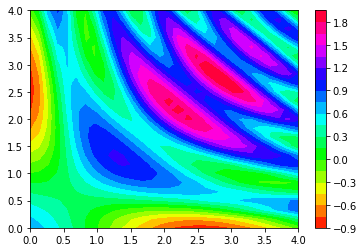

In [ ]:
x = np.linspace(0,4,30)
y = np.linspace(0,4,25)

X,Y = np.meshgrid(x,y)
Z = func(X,Y)

plt.contourf(X, Y, Z, 20, cmap = 'hsv')
plt.colorbar()


**Note** : the functions np.arange and np.linspace are very similar in purpose in picking evenly spaced values in the given interval. But the key difference between them is that in the former case you can control the increments/steps of the evenly spaced values whereas in the later case you only control the start and the stop values(both being inclusive)

### Subplots 

You can plot different things in the same figure using the subplot function. Here is an example:

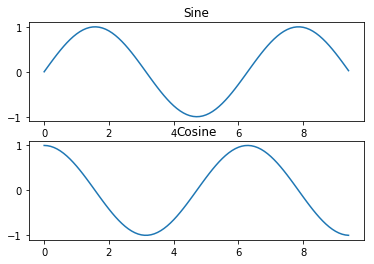

In [ ]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

You can read much more about the `subplot` function in the [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).

###Animation using Matplotlib

A really dope thing we can do with this library is to create animations.
The code below shows the animation of a sine wave

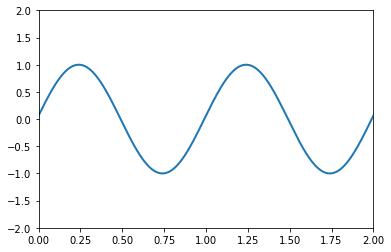

In [10]:
from matplotlib import animation

# Setting up of the figure, axes and the object to be animated
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# Function to plot the background for each frame
def init():
    line.set_data([], [])
    return line,

# Animation Function 
def update(i):                      # i denotes the frame number for which the curve shifts
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# Animation Object Creation 
anim = animation.FuncAnimation(fig, update, init_func=init, frames=200, interval=20, blit=True)

anim.save('sin_anim.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
plt.show()